<Figure size 720x504 with 0 Axes>

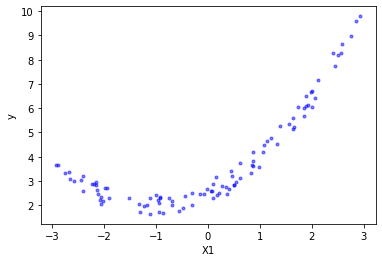

<Figure size 720x504 with 0 Axes>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#For an example, let's create some nonlinear data

m = 100
X = 6 * np.random.rand(m, 1) - 3 
y = 0.5 * X**2  + X +  2 + np.random.rand(m,1)
plt.plot(X, y, "b.",alpha = 0.5)
plt.xlabel("X1")
plt.ylabel("y")
plt.figure(figsize=(10,7))




In [2]:
#Let's transform our training data ,a dding the square of each feature in the training set as a new feature 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)
#print(f"For X: {X[0]} and X_poly: {X_poly[0]}")

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_
#the model's function prediction is
# y(hat) = .51X1**2 + 1.0034X1 + 2.458
#The original function is 
#y = .5X1**2 + X1 + 2.0


(array([2.50068966]), array([[1.01839004, 0.49537259]]))

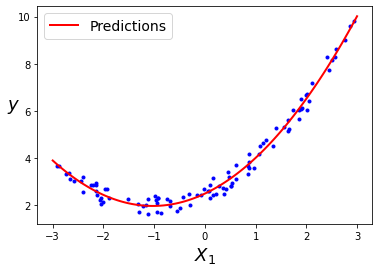

In [3]:

#THIS PLOT GOES BAD BECAUSE THE X Values are not sorted
#i.e my first x value is randomly .05, the next value is 1.5 and the next .2 
#the plot will jump form .05 to 1.5 to .2 in X... with the correspondgin y

# y_predict = lin_reg.predict(X_poly)
# plt.plot(X, y, "b.",alpha = 0.5)
# plt.plot(X, y_predict, "r-")
# plt.xlabel("X1")
# plt.ylabel("y")
# plt.figure(figsize=(10,7))
# plt.show()


X_new=np.linspace(-3, 3, 100).reshape(100, 1) #here we have sort values from -3 to 3
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-",linewidth=2, label="Predictions")
plt.xlabel("$X_1$", fontsize=18) #$ and _ for sub 1
plt.ylabel("$y$", rotation = 0, fontsize = 18)
plt.legend(loc = "upper left", fontsize=14)
plt.show()


#*Learning Curves*


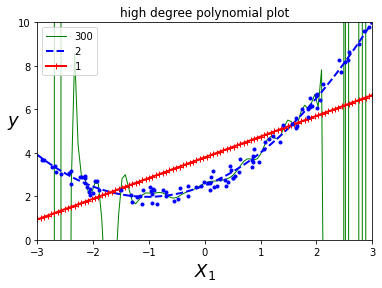

In [4]:
#Let's comparte how a high-degree polynomial regressor,Linear regressor and a quadratic model  fits 
#The training data
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
  polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
  std_scaler = StandardScaler()
  lin_ref = LinearRegression()

  polynomial_regression_pipeline = Pipeline([
    ("poly_features", polybig_features),
    ("std_scaler", std_scaler),
    ("lin_reg", lin_reg),
  ])

  polynomial_regression_pipeline.fit(X, y)
  y_newbig = polynomial_regression_pipeline.predict(X_new)
  plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.title("high degree polynomial plot")
plt.legend(loc='upper left')
plt.xlabel("$X_1$", fontsize = 18)
plt.ylabel("$y$", fontsize= 18, rotation = 0)

plt.axis([-3,3,0,10])
plt.show()

In [5]:
#Now let's do a function that, given some training data, plots the learning curve of a model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def plot_learning_curve(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label = "train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label = "val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)
    



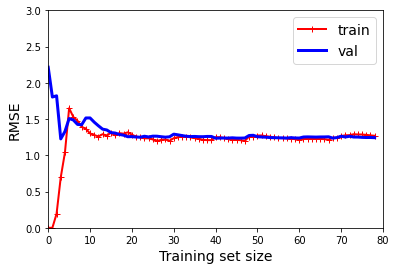

In [6]:
lin_reg = LinearRegression()
plot_learning_curve(lin_reg, X, y)
plt.axis([0,80,0,3])
plt.show()


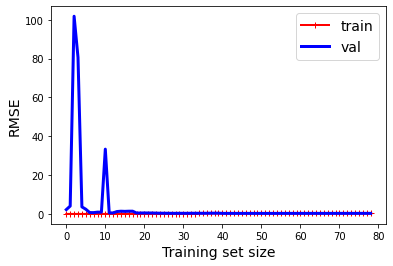

In [7]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
    
])
plot_learning_curve(polynomial_regression, X, y)

#*Regularized Linear Models*

In [8]:
#Preforming Ridge Regression with scikit-learn using a close-form solution
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.22091126]])

In [9]:
#Using Stochastical Gradient Descent
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.20330273])

In [10]:
#Scikit-Learn using Lasso class
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y )
lasso_reg.predict([[1.5]])

array([5.1680901])

In [12]:
#Using ElasticNet with Scikit-learn
from sklearn.linear_model import ElasticNet
ENet = ElasticNet(alpha=0.1, l1_ratio= 0.5) #alpha is how much you want to regularize you features
                                            #l1_ratio is the mix ratio between a Lasso regression and a ridge regression
                                            
ENet.fit(X,y)
ENet.predict([[1.5]])

array([5.17055199])

# **Early Stopping**

In [58]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m,1) - 3 
y = 2 + X + 0.5 * X**2 + np.random.randn(m,1)


X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state = 10)


In [64]:
from copy import deepcopy

#Create our Pipeline for transform the data
poly_scaler = Pipeline([
           ("poly_features", PolynomialFeatures(degree=90, include_bias=False)), 
           ("std_scaler", StandardScaler())

])


#Use our Pipeline of transformers
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.fit_transform(X_val)

#Instance our Stochastic Gradient Descent Regressor
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, 
                       learning_rate = "constant", eta0=0.0005, random_state = 42) #-np.infty = a negative infinit number


minimun_val_error = float("inf")

best_epoch = None
best_model = None


for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train) #Continues where it left off 
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_err  = mean_squared_error(y_val, y_val_predict)
  if val_err < minimun_val_error:
    minimun_val_error = val_err
    best_epoch = epoch
    best_model = deepcopy(sgd_reg)


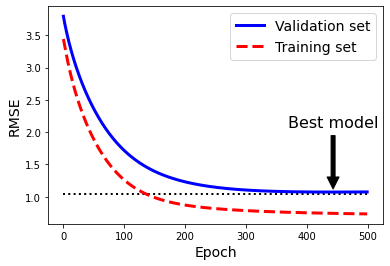

In [65]:
#Let's Create our graph with a new sgd regressor 
#the np.infty is to the sgd_reg don't stop fiting, it doesn't matter 
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None,
                       learning_rate = "constant", eta0=0.0005, random_state = 42)

n_epochs = 500
train_errors, val_errors = [], []

for epoch in range(n_epochs):
  sgd_reg.fit(X_train_poly_scaled, y_train)
  y_train_predict = sgd_reg.predict(X_train_poly_scaled)
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  train_errors.append(mean_squared_error(y_train, y_train_predict))
  val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors) #np.argmin returns the index of the minimun value of validation errors 
best_val_rmse = np.sqrt(val_errors[best_epoch]) 

#Do the notation of a specific point, in this case, showing the point of best_epoch and it rmse
plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse), 
             xytext = (best_epoch,best_val_rmse + 1), 
             ha="center",
             arrowprops = dict(facecolor="black", shrink=0.05), 
             fontsize = 16,
             )

best_val_rmse -= 0.03 #just to make the graph look better 

plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label = "Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=3, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.show()


In [66]:
best_epoch, best_model

(443,
 SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
              eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
              learning_rate='constant', loss='squared_loss', max_iter=1,
              n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
              shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
              warm_start=True))